<a href="https://colab.research.google.com/github/sohapathak/ImageClassifier/blob/main/RajpalYadav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install fastai --upgrade --quiet

     |████████████████████████████████| 194kB 5.6MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 


In [2]:
from fastai.vision.all import *

In [3]:
path = Path('data')
path.mkdir(exist_ok=True)

In [4]:
files = get_image_files(path)
len(files)

29

In [6]:
characters = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # x,y
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [7]:
dls=characters.dataloaders(path)

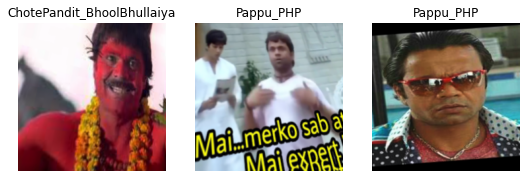

In [8]:
dls=characters.dataloaders(path)
dls = characters.dataloaders(path,bs=5)
dls.show_batch(nrows=1, ncols=3)

In [9]:
learn=cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.148705,2.371129,0.800000,00:00


epoch,train_loss,valid_loss,error_rate,time
0,1.553280,2.061280,1.000000,00:00
1,1.570088,1.308700,0.800000,00:00
2,1.464661,0.804443,0.600000,00:00


In [10]:
learn.predict(files[10])

('ChotePandit_BhoolBhullaiya',
 TensorImage(1),
 TensorImage([0.1544, 0.8190, 0.0266]))

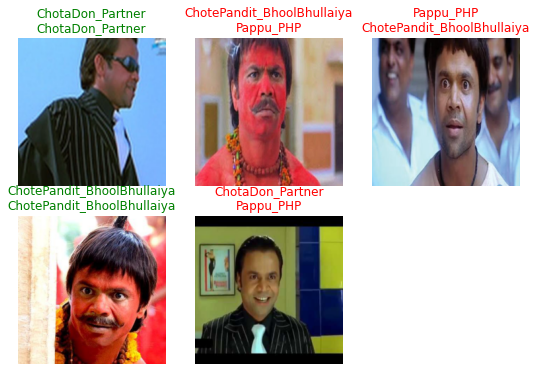

In [11]:
learn.show_results()

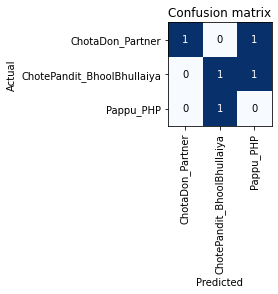

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

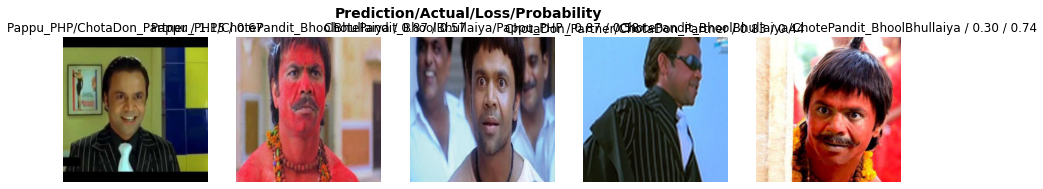

In [13]:
interp.plot_top_losses(5, nrows=1)

In [14]:
learn.export('export.pkl')

In [15]:
!pip install streamlit --quiet
!pip install colab-everything --quiet

     |████████████████████████████████| 7.4MB 4.4MB/s 
     |████████████████████████████████| 4.5MB 52.3MB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
     |████████████████████████████████| 112kB 50.7MB/s 
     |████████████████████████████████| 163kB 49.5MB/s 
     |████████████████████████████████| 6.7MB 46.7MB/s 
     |████████████████████████████████| 102kB 11.3MB/s 
     |████████████████████████████████| 122kB 51.2MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 133kB 44.3MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 133kB 5.6MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.4 which is incompatibl

In [21]:
! wget -q https://raw.githubusercontent.com/sohapathak/Rajpal-Yadav-Characters/main/app.py

In [ ]:
from colab_everything import ColabStreamlit
ColabStreamlit('app.py')

Web App can be accessed on: http://fbeb4b70767a.ngrok.io

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:9999
  External URL: http://34.83.193.232:9999

